# LOADING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg

# READING DATA

In [13]:
m=pd.read_csv(r'C:\Users\Uday\Documents\Summer DataAnalytics assignment\hackathon\Train_Data.csv')
n=pd.read_csv(r'C:\Users\Uday\Documents\Summer DataAnalytics assignment\hackathon\Test_Data.csv')

# DATA DESCRIPTION

* date: the date on which the ad was made live
* campaign: campaign number
* adgroup: adgroup number
* ad: ad number
* impressions - Number of time the ad was shown
* clicks - Number of time the ad clicked shown
* cost - Amount spent to show ad
* conversions - Number of transactions received
* revenue: revenue generated from the ad

**Dataframe m is used for analysing training data
  Dataframe n is used for analysing testing data**


In [12]:
m.head()


,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [14]:
n.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [4]:
Q1 = m.quantile(0.25)
Q3 = m.quantile(0.75)
IQR = Q3 - Q1
print(IQR)



impressions    78.00
clicks         36.00
cost            1.31
conversions     1.00
revenue        92.60
dtype: float64


In [5]:
m_df_out = m[~((m < (Q1 - 1.5 * IQR)) |(m > (Q3 + 1.5 * IQR))).any(axis=1)]
print(m_df_out)

            date    campaign    adgroup     ad  impressions  clicks  cost  \
0     01-08-2020  campaign 1  adgroup 1   ad 1           24       6  0.08   
1     01-08-2020  campaign 1  adgroup 2   ad 1            1       0  0.00   
2     01-08-2020  campaign 1  adgroup 3   ad 1           13       4  0.04   
3     01-08-2020  campaign 1  adgroup 4   ad 1            5       4  0.08   
5     01-08-2020  campaign 1  adgroup 2   ad 2            7       2  0.04   
...          ...         ...        ...    ...          ...     ...   ...   
4566  28-02-2021  campaign 1  adgroup 3  ad 55           19       6  0.07   
4567  28-02-2021  campaign 1  adgroup 4  ad 55            1       0  0.00   
4568  28-02-2021  campaign 1  adgroup 3  ad 56           16       8  0.12   
4569  28-02-2021  campaign 1  adgroup 1  ad 56           37      13  0.23   
4570  28-02-2021  campaign 1  adgroup 1  ad 55           19      10  0.14   

      conversions  revenue  
0               0      0.0  
1               0

In [6]:
m_df_out.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.0
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.0
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.0
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.0
5,01-08-2020,campaign 1,adgroup 2,ad 2,7,2,0.04,0,0.0


In [7]:
enc = OneHotEncoder(handle_unknown='ignore')

In [8]:
enc_df = pd.DataFrame(enc.fit_transform(m_df_out[['adgroup']]).toarray())

In [9]:
enc_df.columns = enc.get_feature_names(['adgroup'])

In [10]:
m_df = m_df_out.join(enc_df)

In [11]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3457 entries, 0 to 4570
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               3457 non-null   object 
 1   campaign           3457 non-null   object 
 2   adgroup            3457 non-null   object 
 3   ad                 3457 non-null   object 
 4   impressions        3457 non-null   int64  
 5   clicks             3457 non-null   int64  
 6   cost               3457 non-null   float64
 7   conversions        3457 non-null   int64  
 8   revenue            3457 non-null   float64
 9   adgroup_adgroup 1  2544 non-null   float64
 10  adgroup_adgroup 2  2544 non-null   float64
 11  adgroup_adgroup 3  2544 non-null   float64
 12  adgroup_adgroup 4  2544 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 538.1+ KB


In [35]:
m_df['CPC'].mode()

0    0.01
dtype: float64

In [179]:
m_df['CPC']=m_df['CPC'].fillna(0.01)

C:\Users\Uday\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='impressions'>

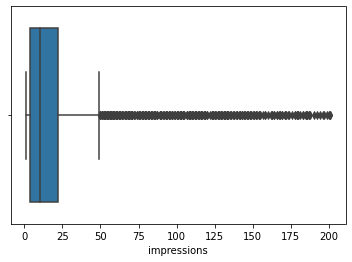

In [13]:
sns.boxplot(m_df['impressions'])

C:\Users\Uday\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cost'>

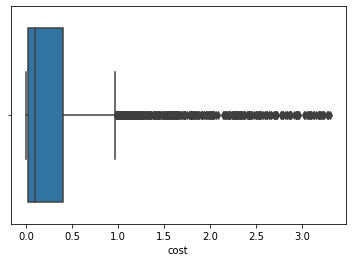

In [14]:
sns.boxplot(m_df['cost'])

In [180]:
m_df.isna().sum()

date                 0
campaign             0
adgroup              0
ad                   0
impressions          0
clicks               0
cost                 0
conversions          0
revenue              0
adgroup_adgroup 1    0
adgroup_adgroup 2    0
adgroup_adgroup 3    0
adgroup_adgroup 4    0
CTR                  0
CPC                  0
dtype: int64

<AxesSubplot:xlabel='adgroup', ylabel='revenue'>

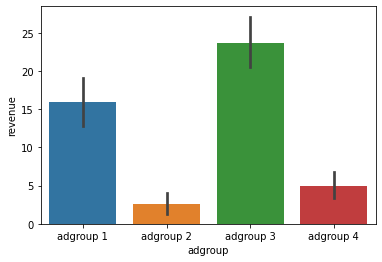

In [16]:
sns.barplot(x='adgroup',y='revenue',data=m_df
           )

In [14]:
m_df['adgroup_adgroup 2'] = m_df['adgroup_adgroup 2'].fillna(0)

In [15]:
m_df['adgroup_adgroup 4'] = m_df['adgroup_adgroup 4'].fillna(0)

In [16]:
m_df['adgroup_adgroup 1'] = m_df['adgroup_adgroup 1'].fillna(1)
m_df['adgroup_adgroup 3'] = m_df['adgroup_adgroup 3'].fillna(1)

In [38]:
m_df['CTR']=m_df['clicks']/m_df['impressions']
m_df['CPC']=m_df['cost']/m_df['clicks']
m_df['CPA']=m_df['cost']/m_df['conversions']

In [40]:
m_df=m_df.drop(['CPA'], axis = 1)

In [41]:
m_df.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,adgroup_adgroup 1,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4,CTR,CPC
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.0,1.0,0.0,0.0,0.0,0.250000,0.013333
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.0,0.0,1.0,0.0,0.0,0.000000,NaN
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.0,0.0,0.0,1.0,0.0,0.307692,0.010000
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.0,0.0,0.0,0.0,1.0,0.800000,0.020000
5,01-08-2020,campaign 1,adgroup 2,ad 2,7,2,0.04,0,0.0,0.0,0.0,0.0,1.0,0.285714,0.020000


In [182]:
m_df.isna().sum()

date                 0
campaign             0
adgroup              0
ad                   0
impressions          0
clicks               0
cost                 0
conversions          0
revenue              0
adgroup_adgroup 1    0
adgroup_adgroup 2    0
adgroup_adgroup 3    0
adgroup_adgroup 4    0
CTR                  0
CPC                  0
dtype: int64

<AxesSubplot:>

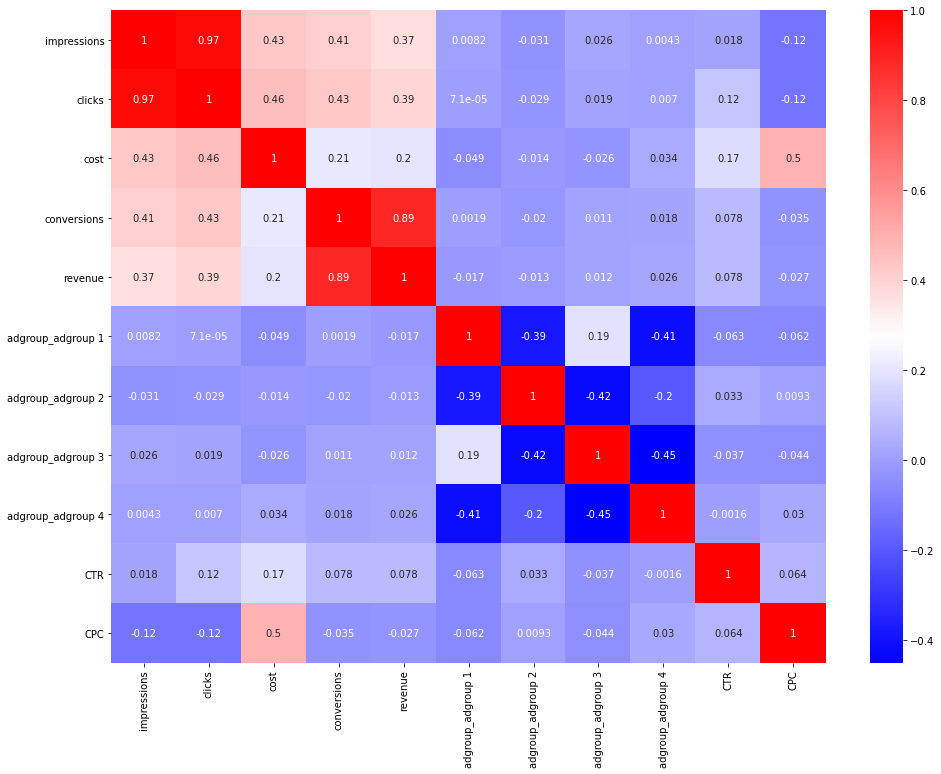

In [43]:
plt.figure(figsize=(16,12))
sns.heatmap(m_df.corr(), cmap='bwr', annot=True)

In [444]:
X_train = m_df[['CTR','CPC','adgroup_adgroup 1','adgroup_adgroup 4','adgroup_adgroup 3','adgroup_adgroup 2','conversions']]
y_train = m_df['revenue']
X_train2 =m_df.drop(['date','cost','campaign','adgroup','ad','revenue','adgroup_adgroup 2','adgroup_adgroup 4'], axis=1)

In [445]:
X_train

,CTR,CPC,adgroup_adgroup 1,adgroup_adgroup 4,adgroup_adgroup 3,adgroup_adgroup 2,conversions
0,0.250000,0.013333,1.0,0.0,0.0,0.0,0
1,0.000000,0.010000,0.0,0.0,0.0,1.0,0
2,0.307692,0.010000,0.0,0.0,1.0,0.0,0
3,0.800000,0.020000,0.0,1.0,0.0,0.0,0
5,0.285714,0.020000,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...
4566,0.315789,0.011667,1.0,0.0,1.0,0.0,0
4567,0.000000,0.010000,1.0,0.0,1.0,0.0,0
4568,0.500000,0.015000,1.0,0.0,1.0,0.0,1
4569,0.351351,0.017692,1.0,0.0,1.0,0.0,0


In [448]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X_train_scaled,y_train, test_size=0.30, random_state=2021)

In [447]:
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)

In [677]:
xgg = xg.XGBRegressor(colsample_bytree=0.9,
                 gamma=0.1,                 
                 learning_rate=0.05,
                 max_depth=6,
                 min_child_weight=1,
                 n_estimators=200,                                                                    
                 reg_alpha=0.01,
                 reg_lambda=1,
                 subsample=0.9,
                 seed=42)

In [678]:
xgg.fit(X_trains, y_trains)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=0.9, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [611]:
print("X_train:", X_trains.shape) # X_train
print("X_test:",X_tests.shape) # X_test
print("y_train:",y_trains.shape) # y_train
print("y_test:",y_tests.shape) # y_test

X_train: (2419, 7)
X_test: (1038, 7)
y_train: (2419,)
y_test: (1038,)


In [679]:
print("Train Data Score: {}".format(xgg.score(X_trains, y_trains)))
print("Test Data Score: {}".format(xgg.score(X_tests, y_tests)))

Train Data Score: 0.9730193900199701
Test Data Score: 0.7653029089147785


In [83]:
nm=pd.read_csv(r'C:\Users\Uday\Documents\Summer DataAnalytics assignment\hackathon\Test_Data.csv')

In [84]:
enc1 = OneHotEncoder(handle_unknown='ignore')

In [85]:
enc1_df = pd.DataFrame(enc.fit_transform(nm[['adgroup']]).toarray())

In [86]:
enc1_df.columns = enc.get_feature_names(['adgroup'])
nm_df = nm.join(enc1_df)
nm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               318 non-null    object 
 1   campaign           318 non-null    object 
 2   adgroup            318 non-null    object 
 3   ad                 318 non-null    object 
 4   cost               318 non-null    float64
 5   impressions        318 non-null    int64  
 6   clicks             318 non-null    int64  
 7   conversions        318 non-null    int64  
 8   adgroup_adgroup 1  318 non-null    float64
 9   adgroup_adgroup 2  318 non-null    float64
 10  adgroup_adgroup 3  318 non-null    float64
 11  adgroup_adgroup 4  318 non-null    float64
dtypes: float64(5), int64(3), object(4)
memory usage: 29.9+ KB


In [92]:
nm_df.isna().sum()

date                 0
campaign             0
adgroup              0
ad                   0
cost                 0
impressions          0
clicks               0
conversions          0
adgroup_adgroup 1    0
adgroup_adgroup 2    0
adgroup_adgroup 3    0
adgroup_adgroup 4    0
CTR                  0
CPC                  0
dtype: int64

In [88]:
nm_df['CTR']=nm_df['clicks']/nm_df['impressions']
nm_df['CPC']=nm_df['cost']/nm_df['clicks']

In [91]:
nm_df['CPC']=nm_df['CPC'].fillna(0.01)

In [93]:
nm_df.shape

(318, 14)

In [453]:
X_test1 =nm_df[['CTR','CPC','adgroup_adgroup 1','adgroup_adgroup 4','adgroup_adgroup 3','adgroup_adgroup 2','conversions']]
X_test2 =nm_df.drop(['date','campaign','adgroup','ad','cost','impressions','clicks','adgroup_adgroup 2','adgroup_adgroup 4'], axis=1)

In [454]:
X_test1

,CTR,CPC,adgroup_adgroup 1,adgroup_adgroup 4,adgroup_adgroup 3,adgroup_adgroup 2,conversions
0,0.404959,0.011837,1.0,0.0,0.0,0.0,1
1,0.545455,0.014167,0.0,0.0,1.0,0.0,0
2,0.600000,0.016667,0.0,1.0,0.0,0.0,0
3,0.500000,0.010000,0.0,0.0,0.0,1.0,0
4,0.333333,0.010000,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
313,1.000000,0.010000,0.0,1.0,0.0,0.0,0
314,0.200000,0.010000,0.0,0.0,1.0,0.0,0
315,0.440000,0.012727,1.0,0.0,0.0,0.0,0
316,0.444444,0.015000,0.0,0.0,1.0,0.0,0


In [670]:
scaler = StandardScaler()
X_test1_scaled= scaler.fit_transform(X_test1)

In [671]:
X_test1_scaled.shape

(318, 7)

In [680]:
predxgg=xgg.predict(X_test1_scaled)

In [681]:
resrxg = pd.DataFrame(predxgg)
resrxg.columns = ["revenue"]
resrxg.to_csv("prediction_resultsxgboost3(moreEDA).csv")